In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [8]:
df = pd.read_csv("./datasets/disaster_combo.csv")
df.head()

,y_label,headline,pub_date,snippet,web_url
0,0.0,Hurricanes' Svechnikov in Concussion Protocol,2019-04-16T16:55:33+0000,Carolina Hurricanes rookie forward Andrei Svec...,https://www.nytimes.com/reuters/2019/04/16/spo...
1,0.0,‘It’s Making Us Less Prepared’: Shutdown Slows...,2019-01-18T10:00:09+0000,The partial government shutdown has kept storm...,https://www.nytimes.com/2019/01/18/us/governme...
2,0.0,Housing Vouchers Ending for Hurricane Michael ...,2019-04-11T18:05:57+0000,Hundreds of residents in the county hardest hi...,https://www.nytimes.com/aponline/2019/04/11/us...
3,0.0,An Action Plan to Reduce Hurricane Havoc,2018-10-12T20:08:55+0000,A reader calls for upgrading our built environ...,https://www.nytimes.com/2018/10/12/opinion/let...
4,0.0,Capitals Survive Surge From Hurricanes to Win ...,2019-04-12T02:25:00+0000,Nicklas Backstrom and Alex Ovechkin came out f...,https://www.nytimes.com/aponline/2019/04/11/sp...


In [9]:
df.y_label.value_counts(normalize=True)

0.0    0.933613
1.0    0.066387
Name: y_label, dtype: float64

In [10]:
labels = ["Off-Topic", "On-Topic"]

<IPython.core.display.Javascript object>


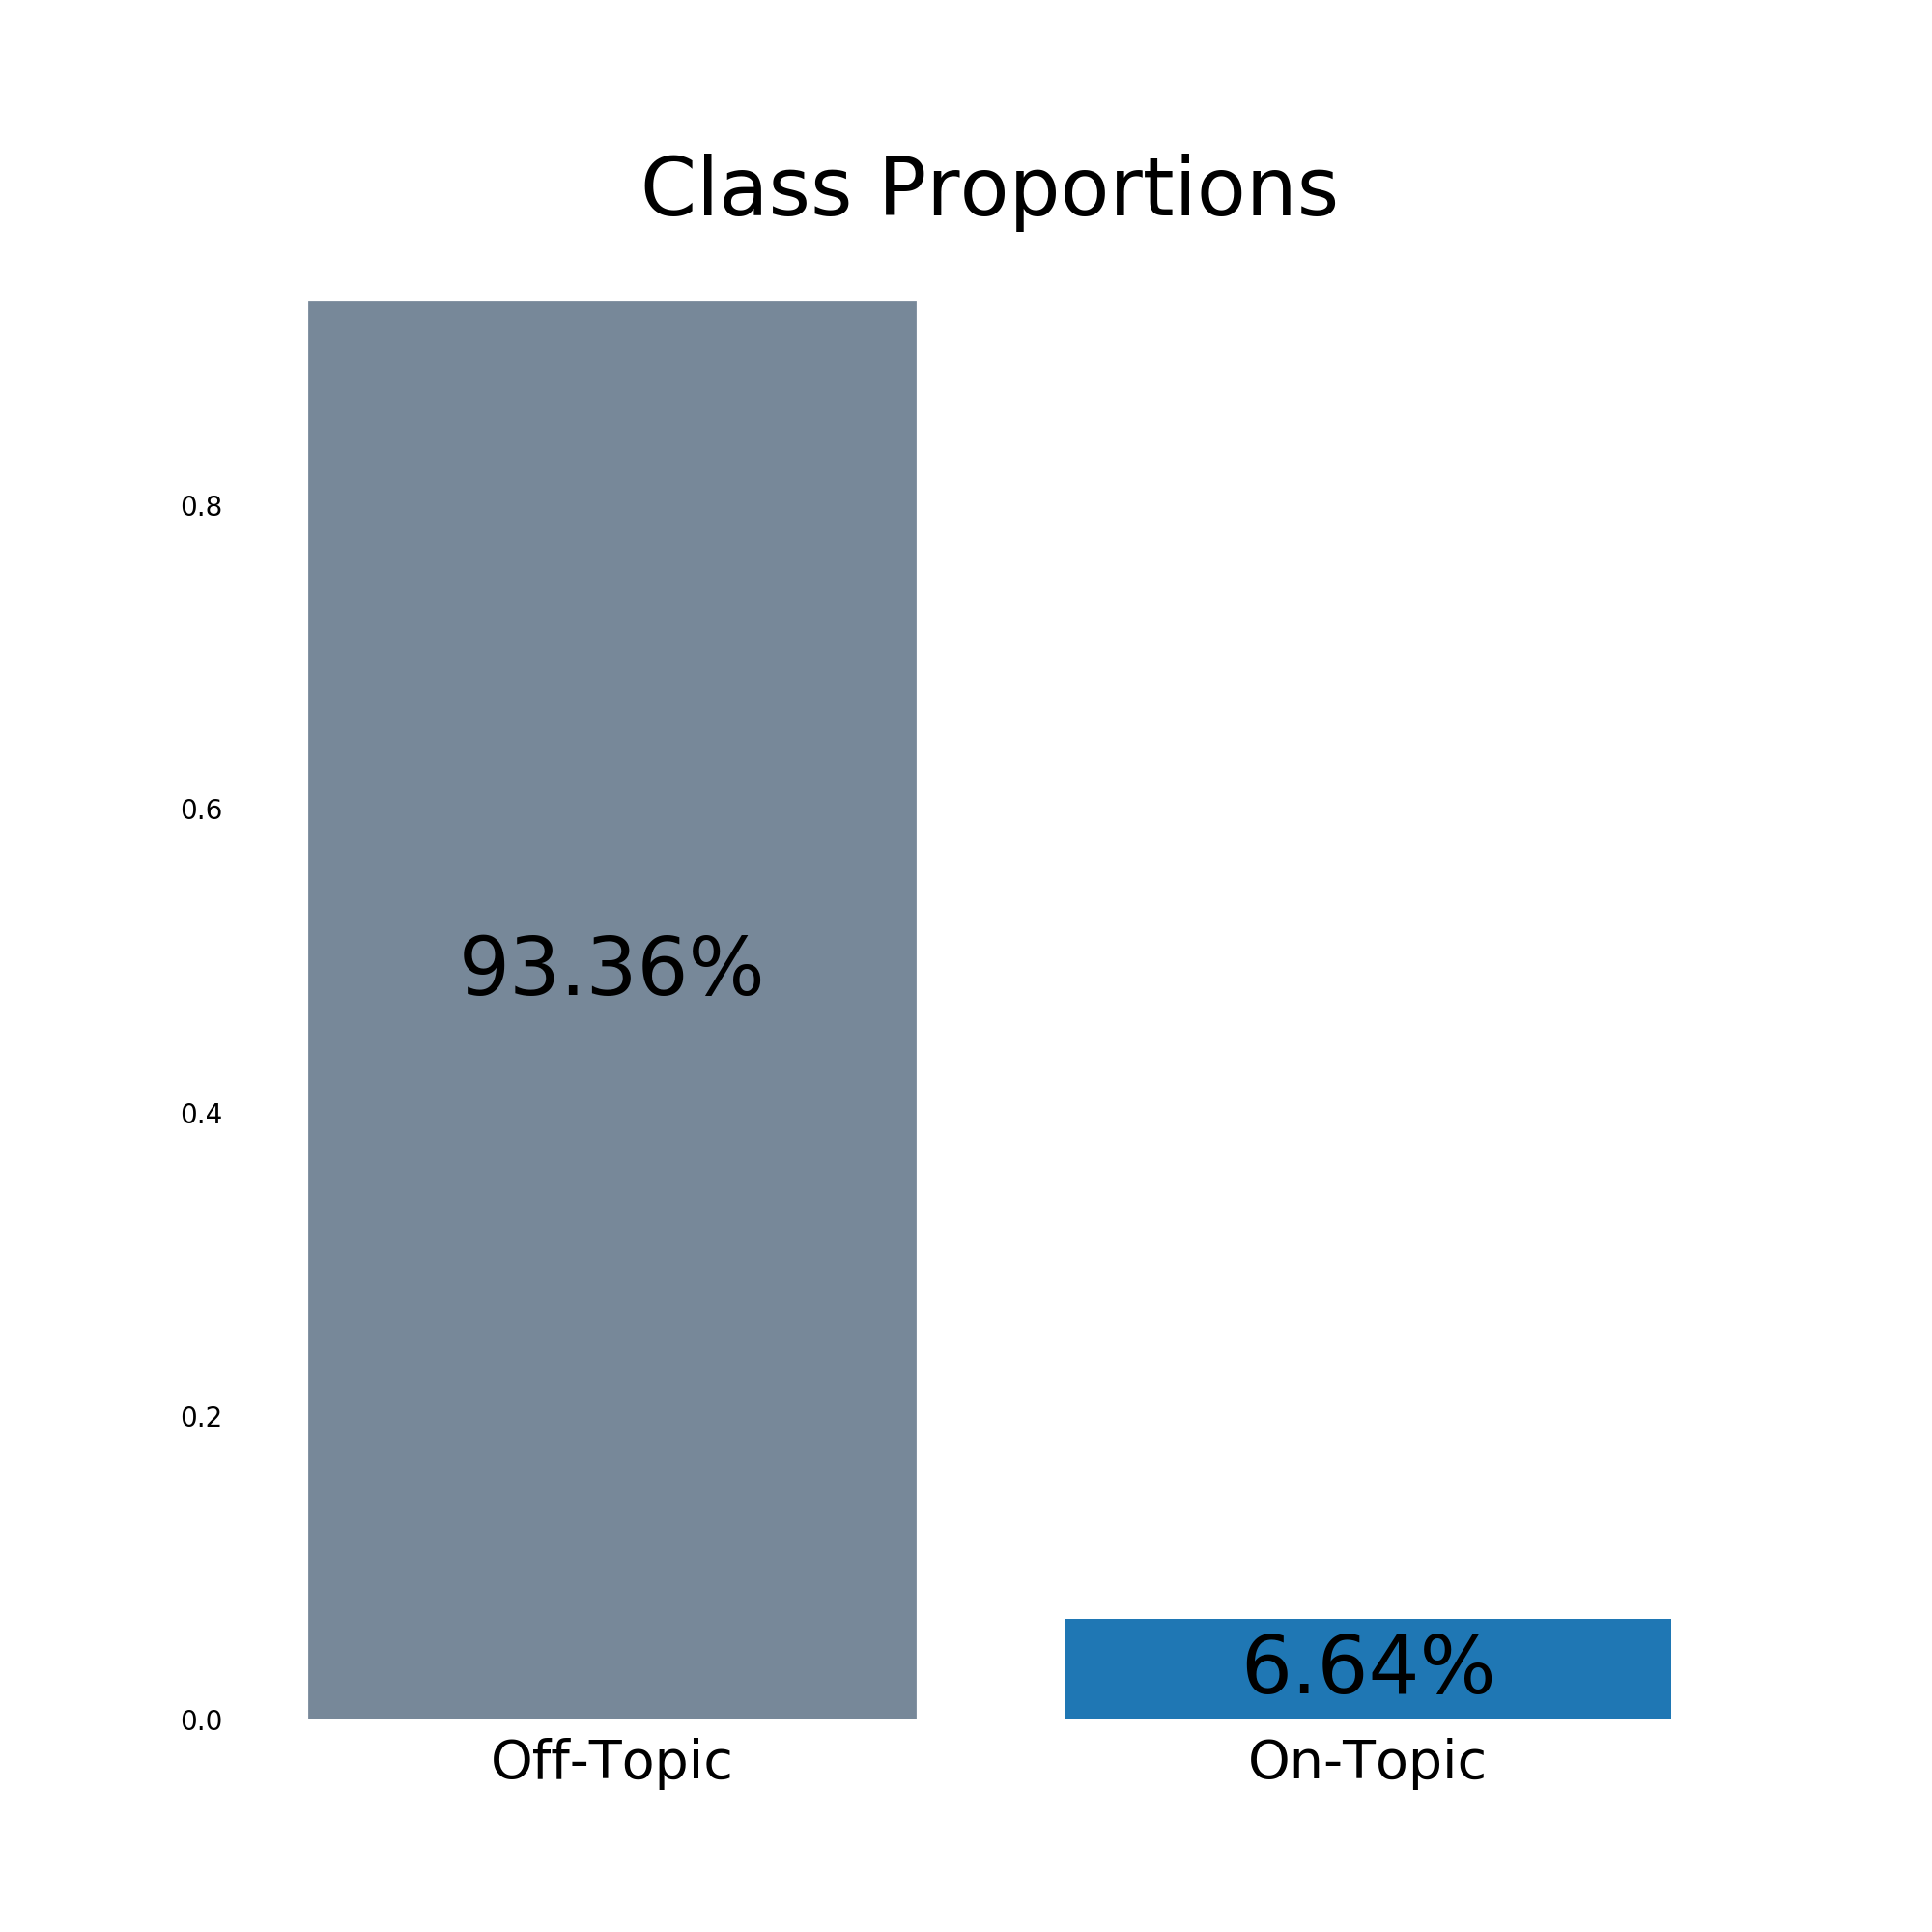

In [11]:
# Adopted from Jacob Koehler's example notebook on bar chart customization
plt.figure(figsize=(10,10))
bars = plt.bar(labels,df.y_label.value_counts(normalize=True))

In [12]:
plt.tick_params(top = False, bottom = False, left = False, right = False)

In [13]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [14]:
plt.xticks(labels,size=20)

([<matplotlib.axis.XTick at 0x1a1a9bb4a8>,
 <a list of 2 Text xticklabel objects>)

In [15]:
plt.gca().text(bars[0].get_x()+bars[0].get_width()/2,
               bars[0].get_height() - 8, str(df.y_label.value_counts(normalize=True) *100) + '%',
               ha = 'center',
               color = 'w',
               fontsize = 15)

Text(0.0, -7.066386722655469, '0.0    93.361328\n1.0     6.638672\nName: y_label, dtype: float64%')

In [16]:
#autolabel adopted from https://www.science-emergence.com/Articles/How-to-add-text-on-a-bar-with-matplotlib-/
def autolabel(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        if idx == 0:
            plt.gca().text(rect.get_x() + rect.get_width()/2., .5*height,
                    bar_label[idx],
                    ha='center', va='bottom', size=30)
        #since the second bar is so small, height needs to be reduced more to keep it bound within
        else:
            plt.gca().text(rect.get_x() + rect.get_width()/2., .1*height,
                    bar_label[idx],
                    ha='center', va='bottom', size=30)

These next lines make the percentage labels for the bars and then put them on top of them.

In [17]:
bar_label = list(round(df.y_label.value_counts(normalize=True),4)*100)

In [18]:
bar_label = [str(percent) + "%" for percent in bar_label]

In [19]:
bar_label

['93.36%', '6.64%']

In [20]:
autolabel(bars)

In [22]:
plt.title("Class Proportions",size=30)

Text(0.5, 1.0, 'Class Proportions')

In [25]:
bars[0].set_color('lightslategray')

In [26]:
plt.savefig("./fig.png")